# Исследование надежности заемщиков


Описание проекта
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Описание данных:

    children — количество детей в семье
    days_employed — общий трудовой стаж в днях
    dob_years — возраст клиента в годах
    education — уровень образования клиента
    education_id — идентификатор уровня образования
    family_status — семейное положение
    family_status_id — идентификатор семейного положения
    gender — пол клиента
    income_type — тип занятости
    debt — имел ли задолженность по возврату кредитов
    total_income — ежемесячный доход
    purpose — цель получения кредита

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [2]:
import pandas as pd
import seaborn as sns

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

,Общее число кредитов,Просроченных кредитов,% просроченных кредитов,% от общего числа кредитов
children,,,,
0,14091.0,1063.0,7.54,66.06
1,4808.0,444.0,9.23,22.54
2,2052.0,194.0,9.45,9.62
3,330.0,27.0,8.18,1.55
4,41.0,4.0,9.76,0.19
5,9.0,0.0,0.00,0.04
Итог:,21331.0,1732.0,44.16,100.00


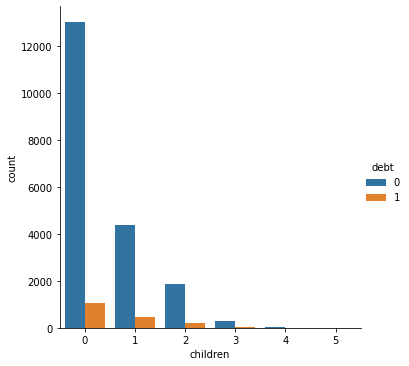

In [23]:
import numpy as np
table = pd.pivot_table(data,                               # согласен сводной таблицей было быстрее и нагляднее 
                       index=["children"],
                       values=["debt"],
                       aggfunc={"debt": [np.sum,"count"]}, # mean() не использовал т.к. выдаст отношение, а нагляднее процент.
                       fill_value=0,                                            
                      )
table.columns = ["A","B"] # временно для удобства
table['% of debt'] = round(table.B/table.A* 100, 2)#.astype(str) + '%' при необходимости вывести текстом знак %, но тогда итог не посчитается
table['% of debt total'] = round(table.A/len(data)* 100, 2)
table.loc['Итог:', :] = table.sum().values

table.columns = ["Общее число кредитов","Просроченных кредитов"," % просроченных кредитов","% от общего числа кредитов"]
display(table)

sns.catplot(data=data, x="children", kind = "count", hue="debt")


**Вывод:**  *На первый взгляд* существует линейная зависимость между количеством детей и возвратом кредита в срок,
как видно из графиков и расчетов в абсолютных значениях погасивших кредит в срок без наличия детей составляет **62,5%** от всех погасивших в срок, а заемщики с более 3 детьми практически всегда не оплачивают в срок кредит.

    Хотелось бы отметить, что семьи с большим кол-вом детей более взвешенно берут кредиты, что сказалось на кол-ве выданных кредитных портфелей, их суммарное кол-во меньше выборки по группе без детей.
    
    Исходя из этих данных более детально рассмотрим эти выборки. Выборку по кредиторам с 5 детьми придется исключить - слишком мала, чтобы принимать на текущий момент её во внимание.(9 позиций)
    
    Просчитав отношения закрытых вовремя кредитов по отношению к общему числу кредитных портфелей внутри групп, обнаружили, что по факту кредиторы с детьми чаще закрывают кредиты без просрочек, практически на 1,5 процента.   
    



#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
                                   # получим общее кол-во кредитов по группам
x = data["family_status"].value_counts().sort_index()

y = data.groupby('family_status')['debt'].sum().sort_index()
                                   # получим число закрытых в срок кредитов по тем же группам

z = []
                                   # посчитаем процент кол-ва оплаченных вовремя кредитов
for item in range(len(data["family_status"].value_counts())):     
    z.append(round(y[item]/x[item]*100,2))
    
                                   # для демонстрации сделаем отдельный датафрейм и выведем его табличкой через ком-ду Display()
z = pd.Series(z, index=["Не женат / не замужем","в разводе","вдовец / вдова","гражданский брак","женат / замужем"])                
df = pd.DataFrame([x,y,z] ,columns=x.index.tolist(), index=["кол-во кредитов","кредиты погашенные","% погашенных кредитов"] )
display(df)

,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
кол-во кредитов,2796.00,1189.00,951.00,4134.00,12261.00
кредиты погашенные,273.00,84.00,63.00,385.00,927.00
% погашенных кредитов,9.76,7.06,6.62,9.31,7.56


**Вывод:**  Зависимость между семейным положением и возвратом кредита в срок существует, лучше всего возвращают кредиты лица в статусе "Не женат/не замужем", хуже всех 2 категории статусов -"В разводе" и "вдовец/вдова".

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [26]:
# У нас есть категоризация по доходам
#    0–30000 — 'E';
#    30001–50000 — 'D';
#    50001–200000 — 'C';
#    200001–1000000 — 'B';
#    1000001 и выше — 'A'.
# Построим график зависимостей
#sns.catplot(data=sort, x="total_income_category", kind = "count", hue="debt")

# Сделаем сводную таблицу
table_gruppa = pd.pivot_table(data,                               
                       index=["total_income_category"],
                       values=["debt"],
                       aggfunc={"debt": ["sum","count"]}, 
                       fill_value=0,                                            
                      )
table_gruppa.columns = ["A","B"] # временно для удобства
table_gruppa['% of debt'] = round(table_gruppa.B/table_gruppa.A* 100, 2)#.astype(str) + '%' при необходимости вывести текстом знак %, но тогда итог не посчитается
table_gruppa['% of debt total'] = round(table_gruppa.A/len(data)* 100, 2)
table_gruppa.loc['Итог:', :] = table_gruppa.sum().values

table_gruppa.columns = ["Общее число кредитов","Просроченных кредитов"," % просроченных кредитов","% от общего числа кредитов"]
display(table_gruppa)

,Общее число кредитов,Просроченных кредитов,% просроченных кредитов,% от общего числа кредитов
total_income_category,,,,
A,25.0,2.0,8.00,0.12
B,5014.0,354.0,7.06,23.51
C,15921.0,1353.0,8.50,74.64
D,349.0,21.0,6.02,1.64
E,22.0,2.0,9.09,0.10
Итог:,21331.0,1732.0,38.67,100.01


**Вывод:** Выборки по категориям А и Е придется не учитывать, так как они слишком малы. Самый массовый сегмент находится в диапазоне от 50 до 200 тыс, при этом процент просроченных кредитов составляет 8,5% Далее с 7,0% идет сегмент B в диапазоне доходов от 200тыс до 1млн, самая малочисленная выборка с 6% в диапазоне 30-50тыс.

Зависимость между уровнем дохода и возвратом кредита в срок наблюдается и самые добросовестные заемщики - это заемщики с доходом в 30-50тыс.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,Общее число кредитов,Просроченных кредитов,% просроченных кредитов,% от общего числа кредитов
purpose_category,,,,
операции с автомобилем,4279.0,400.0,9.35,20.06
операции с недвижимостью,10751.0,780.0,7.26,50.40
получение образования,3988.0,369.0,9.25,18.70
проведение свадьбы,2313.0,183.0,7.91,10.84
Итог:,21331.0,1732.0,33.77,100.00


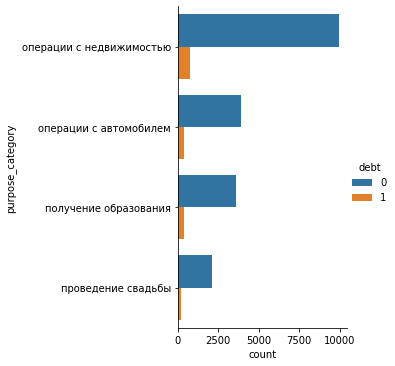

In [27]:
sns.catplot(data=data, y="purpose_category", kind = "count", hue="debt")
table_categ = pd.pivot_table(data,                         
                       index=["purpose_category"],
                       values=["debt"],
                       aggfunc={"debt": [np.sum,"count"]}, 
                       fill_value=0,                                            
                      )
table_categ.columns = ["A","B"] # временно для удобства
table_categ['% of debt'] = round(table_categ.B/table_categ.A* 100, 2)#.astype(str) + '%' при необходимости вывести текстом знак %, но тогда итог не посчитается
table_categ['% of debt total'] = round(table_categ.A/len(data)* 100, 2)
table_categ.loc['Итог:', :] = table_categ.sum().values

table_categ.columns = ["Общее число кредитов","Просроченных кредитов"," % просроченных кредитов","% от общего числа кредитов"]
display(table_categ)                   

<div class="alert alert-info">
<h4> Вывод: <a class="tocSkip"></h4>    
Категории по кол-ву кредитов располагаются в следующем порядке: наибольшее кол-во - недвижимость, затем автомобили, образование и свадьбы.
    
    - Недвижимость, на текущий момент рассматривается для большинства как единственная возможность приобретения жилья, отсюда и и большое кол-во кредитов в этой категории (50%), поскольку в большинстве случаях аренда сопоставима с платежом по кредиту отсюда минимальная просрочка кредитных портфелей, всего 7,26%
    - Автомобили, второй по численности и Образование с небольшим отставанием занимает 3ье место (20% и 18,7% соответсвенно), с 9,3% просроченными кредитами, к ним скорее всего относятся более легко отсюда и более высокий процент.
    - Кредиты на свадьбу, новое направление, но более низкий процент 7,91% объясняется тем, что большинство заемщиков, подаренными деньгами частично или полностью оплачивают кредит.
</div>

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Пропуски в данных у нас в полях Трудовой Стаж и Доход, могли возникнуть в случаях :
 - официально не был трудоустроен
 - ИП, в налогах отчитывается по 0
 - чел фактор, не внесли при анкетировании
 - заемщик сознательно отказался указывать эти данные по личным соображениям

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:*  Как правило это даст более приблеженное значение к действительности, особенно если у нас достаточно большой разбор по значениям и скорее всего будут присутствовать выбросы, в таком случае среднее значение будет далеко от истины и его лучше не применять.

### Шаг 4: общий вывод.

In [28]:
table_2 = pd.pivot_table(data,                         
                       index=["family_status","children"],
                       values=["debt"],
                       aggfunc={"debt": [np.sum,"count"]}, 
                       fill_value=0,                                            
                      )
table_2.columns = ["A","B"] # временно для удобства
table_2[' % просроченных кредитов'] = round(table_2.B/table_2.A* 100, 2)#.astype(str) + '%' при необходимости вывести текстом знак %, но тогда итог не посчитается
table_2.loc['Итог:', :] = table_2.sum().values
table_2.columns = ["Общее число кредитов","Просроченных кредитов"," % просроченных кредитов"]

table_20 = table_2[table_2["Общее число кредитов"] >=20]
table_20 = table_20.sort_values(by = ' % просроченных кредитов')

display(table_20) 
display(table_20.head()) 
display(table_20.tail())    

    

Общее число кредитов  Просроченных кредитов  \
family_status         children                                                
вдовец / вдова        0                        847.0                   53.0   
в разводе             1                        312.0                   21.0   
женат / замужем       3                        249.0                   17.0   
                      0                       7468.0                  516.0   
в разводе             0                        784.0                   55.0   
женат / замужем       1                       2975.0                  246.0   
гражданский брак      0                       2730.0                  229.0   
в разводе             2                         81.0                    7.0   
гражданский брак      2                        343.0                   30.0   
вдовец / вдова        1                         77.0                    7.0   
Не женат / не замужем 0                       2262.0                  210.0   
женат / замужем       2                       1533.0                  145.0   
                      4                         29.0                    3.0   
Не женат / не замужем 1                        449.0                   52.0   
гражданский брак      1                        995.0                  118.0   
Не женат / не замужем 2                         75.0                    9.0   
гражданский брак      3                         56.0                    8.0   
вдовец / вдова        2                         20.0                    3.0   
Итог:                                        21331.0                 1732.0   

                                 % просроченных кредитов  
family_status         children                            
вдовец / вдова        0                             6.26  
в разводе             1                             6.73  
женат / замужем       3                             6.83  
                      0                             6.91  
в разводе             0                             7.02  
женат / замужем       1                             8.27  
гражданский брак      0                             8.39  
в разводе             2                             8.64  
гражданский брак      2                             8.75  
вдовец / вдова        1                             9.09  
Не женат / не замужем 0                             9.28  
женат / замужем       2                             9.46  
                      4                            10.34  
Не женат / не замужем 1                            11.58  
гражданский брак      1                            11.86  
Не женат / не замужем 2                            12.00  
гражданский брак      3                            14.29  
вдовец / вдова        2                            15.00  
Итог:                                             242.29

Общее число кредитов  Просроченных кредитов  \
family_status   children                                                
вдовец / вдова  0                        847.0                   53.0   
в разводе       1                        312.0                   21.0   
женат / замужем 3                        249.0                   17.0   
                0                       7468.0                  516.0   
в разводе       0                        784.0                   55.0   

                           % просроченных кредитов  
family_status   children                            
вдовец / вдова  0                             6.26  
в разводе       1                             6.73  
женат / замужем 3                             6.83  
                0                             6.91  
в разводе       0                             7.02

,,Общее число кредитов,Просроченных кредитов,% просроченных кредитов
family_status,children,,,
гражданский брак,1,995.0,118.0,11.86
Не женат / не замужем,2,75.0,9.0,12.00
гражданский брак,3,56.0,8.0,14.29
вдовец / вдова,2,20.0,3.0,15.00
Итог:,,21331.0,1732.0,242.29


<div class="alert alert-info">
<h4> общий вывод: <a class="tocSkip"></h4>  
    Изначальный запрос банка - Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.
    Чтобы оценить способность заемщика вернуть кредит, обьеденим результаты в одну таблицу (из подгрупп исключим те в которых кол-во заемщиков менее 20 как наименее информативные, 0.2% от общего числа заемщиков ) и выведем топ 5 самых надежных заемщиков:
    
    - вдовец / вдова 	детей=0 	 	6.26%
    - в разводе 	    детей=1 	 	6.73%
    - женат / замужем 	детей=3 		6.83%
    -                   детей=0 	 	6.91%
    - в разводе 	    детей=0 		7.02%
    
Как видно в основном в группу вошли заемщики без детей, а заемщики в статусе  "женат / замужем" и в "в разводе "заняли сразу 2 место, что удивительно в этой подгруппе с 1 и 2 детьми процент просроченных кредитов значительно выше - 8.27% и 9.46% соответственно.
        
       Выведем топ 5 самых не надежных заемщиков: 
    
      - гражданский брак 	    детей=1 	11.86
      - Не женат / не замужем 	детей=2 	12.00
      - гражданский брак 	    детей=3 	14.29
      - вдовец / вдова 	        детей=2 	15.00    

Как видно внизу списка бездетных заемщиков нет, а заемщики в статусе "гражданский брак" занаили сразу 2 позиции внизу списка.
Исходя из общей картины мы видим что и семейное положение и кол-во детей влияет на платежеспособность клиента, в целом можно сказать что с ростом числа детей платежеспособность клиентов падает, самы наглядный пример это категория "вдовец / вдова" - без детей они самые надежные заемщики и воглавляют наш список с 6.26%, но они же и замыкают его при наличии 2х детей - с 15% просроченных кредитов, т.е. в 3раза. Нагляден и тот факт что в топе 3группы без детей а в низу списка бездетных нет.
    
    Итоговая таблица может послужить банку в качестве выставления коэфффициента для построения модели кредитного скоринга.
    
    

</div>